In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN , Dense

In [2]:
# Load the stock data
df = pd.read_csv('C:/Users/Asus/Desktop/RCOEM/Sem 4/Deep Learning/INFY.csv')  

In [3]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [4]:
# Split the data into training and testing sets
train_data = scaled_data[:int(0.8 * len(scaled_data))]
test_data = scaled_data[int(0.8 * len(scaled_data)):]

In [5]:
# Function to create the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    return model



In [6]:
def create_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(1, 1)))
    model.add(SimpleRNN(units=50))
    model.add(Dense(units=1))
    return model

In [7]:
# Create and compile the LSTM model
lstm_model = create_lstm_model()
lstm_model.compile(optimizer='adam', loss='mean_squared_error')



In [8]:
# Create and compile the RNN model
rnn_model = create_rnn_model()
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Prepare the training data
X_train = []
y_train = []
for i in range(1, len(train_data)):
    X_train.append(train_data[i-1:i])
    y_train.append(train_data[i])

X_train = np.array(X_train)
y_train = np.array(y_train)



In [10]:
# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1)



Epoch 1/10
4892/4892 [==============================] - 20s 3ms/step - loss: 5.1172e-04
Epoch 2/10
4892/4892 [==============================] - 13s 3ms/step - loss: 6.7918e-05
Epoch 3/10
4892/4892 [==============================] - 17s 3ms/step - loss: 6.0787e-05
Epoch 4/10
4892/4892 [==============================] - 20s 4ms/step - loss: 6.0692e-05
Epoch 5/10
4892/4892 [==============================] - 17s 4ms/step - loss: 5.8165e-05
Epoch 6/10
4892/4892 [==============================] - 13s 3ms/step - loss: 5.9296e-05
Epoch 7/10
4892/4892 [==============================] - 13s 3ms/step - loss: 5.5098e-05
Epoch 8/10
4892/4892 [==============================] - 15s 3ms/step - loss: 5.2139e-05
Epoch 9/10
4892/4892 [==============================] - 14s 3ms/step - loss: 5.2423e-05
Epoch 10/10
4892/4892 [==============================] - 14s 3ms/step - loss: 5.2399e-05


In [11]:
lstm_model.save('keras_LSTM_model.h5')

In [12]:
# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1)



Epoch 1/10
4892/4892 [==============================] - 13s 2ms/step - loss: 9.4209e-05
Epoch 2/10
4892/4892 [==============================] - 14s 3ms/step - loss: 7.0457e-05
Epoch 3/10
4892/4892 [==============================] - 15s 3ms/step - loss: 6.4942e-05
Epoch 4/10
4892/4892 [==============================] - 13s 3ms/step - loss: 6.0166e-05
Epoch 5/10
4892/4892 [==============================] - 12s 2ms/step - loss: 5.8697e-05
Epoch 6/10
4892/4892 [==============================] - 9s 2ms/step - loss: 5.4209e-05
Epoch 7/10
4892/4892 [==============================] - 12s 2ms/step - loss: 5.3300e-05
Epoch 8/10
4892/4892 [==============================] - 8s 2ms/step - loss: 5.2789e-05
Epoch 9/10
4892/4892 [==============================] - 8s 2ms/step - loss: 5.4894e-05
Epoch 10/10
4892/4892 [==============================] - 8s 2ms/step - loss: 5.2834e-05


In [13]:
rnn_model.save('keras_RNN_model.h5')

In [18]:
# Make predictions on the test data
X_test = []
y_test = []
for i in range(1, len(test_data)):
    X_test.append(test_data[i-1:i])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)

lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)


39/39 [==============================] - 0s 1ms/step


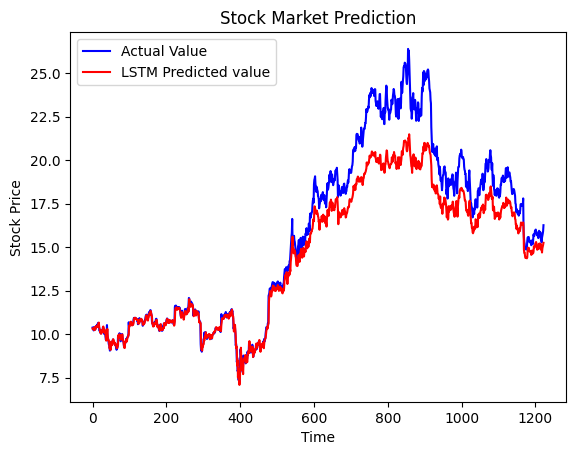

In [20]:
# Plot the results
plt.plot(df['close'].values[int(0.8 * len(scaled_data)) + 1:], color='blue', label='Actual Value')
plt.plot(lstm_predictions, color='red', label='LSTM Predicted value')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()

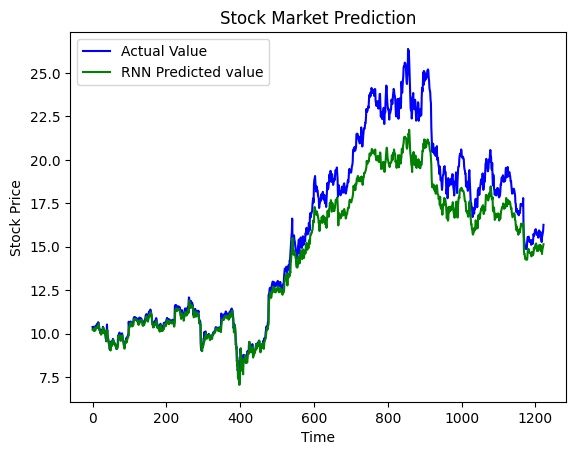

In [21]:
# Plot the results
plt.plot(df['close'].values[int(0.8 * len(scaled_data)) + 1:], color='blue', label='Actual Value')
plt.plot(rnn_predictions, color='green', label='RNN Predicted value')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()

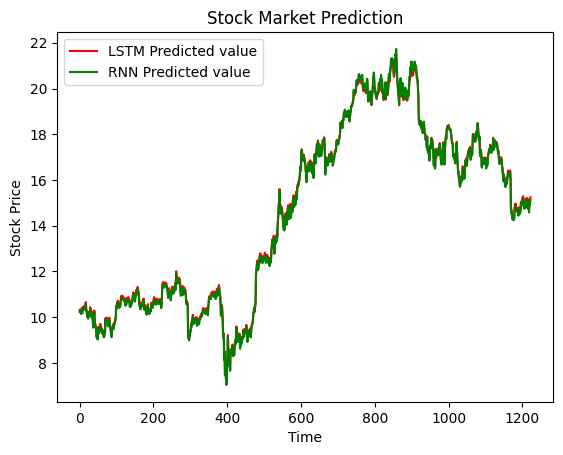

In [22]:
# Plot the results
plt.plot(lstm_predictions, color='red', label='LSTM Predicted value')
plt.plot(rnn_predictions, color='green', label='RNN Predicted value')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()